# Appending new rows to DataFrames

In [1]:
import pandas as pd
import numpy as np

In [2]:
names = pd.read_csv('./data/names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [4]:
new_data_list = ['Aria', 3]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,3


In [5]:
names.loc['five'] = ['Juoh', 16]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,3
five,Juoh,16


In [6]:
names.loc[len(names)] = {'Name':'Zayd', 'Age':2}
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,3
five,Juoh,16
6,Zayd,2


In [7]:
names.loc[len(names)] = pd.Series({'Age':32,'Name':'Dean'})
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,3
five,Juoh,16
6,Zayd,2
7,Dean,32


In [8]:
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s2 = pd.Series({'Name': 'ZZZZ', 'Age': 14}, name='USA')
names.append([s1, s2])

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,3
five,Juoh,16
6,Zayd,2
7,Dean,32
8,Zach,3
USA,ZZZZ,14


In [9]:
bball_16 = pd.read_csv('./data/baseball16.csv')
bball_16.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0


In [11]:
data_dict = bball_16.loc[0].to_dict()
data_dict

{'2B': 42,
 '3B': 5,
 'AB': 640,
 'BB': 60,
 'CS': 10.0,
 'G': 161,
 'GIDP': 15.0,
 'H': 216,
 'HBP': 7.0,
 'HR': 24,
 'IBB': 11.0,
 'R': 108,
 'RBI': 96.0,
 'SB': 30.0,
 'SF': 7.0,
 'SH': 3.0,
 'SO': 70.0,
 'lgID': 'AL',
 'playerID': 'altuvjo01',
 'stint': 1,
 'teamID': 'HOU',
 'yearID': 2016}

In [17]:
new_data_dict = {
    key: '' if isinstance(value, str) else np.nan for key, value in data_dict.items()
}

In [18]:
new_data_dict
# a new data frame keep the key value.

{'2B': nan,
 '3B': nan,
 'AB': nan,
 'BB': nan,
 'CS': nan,
 'G': nan,
 'GIDP': nan,
 'H': nan,
 'HBP': nan,
 'HR': nan,
 'IBB': nan,
 'R': nan,
 'RBI': nan,
 'SB': nan,
 'SF': nan,
 'SH': nan,
 'SO': nan,
 'lgID': '',
 'playerID': '',
 'stint': nan,
 'teamID': '',
 'yearID': nan}

loc method modifies the original DataFrame.  
append will never modifies the original DataFrame

# Concatenating multiple DataFrames together

In [19]:
stock_2016 = pd.read_csv('./data/stocks_2016.csv', index_col='Symbol')
stock_2017 = pd.read_csv('./data/stocks_2017.csv', index_col='Symbol')

In [20]:
stock_2016.head()

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [21]:
stock_2017.head()

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23


In [22]:
s_list = [stock_2016, stock_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


By default, the concat function concatenates DataFrames vertically, one on top of the other.One issue with the preceding DataFrame is that there is no way to identify the year of each row. The concat function allows each piece of the resulting DataFrame to be labeled with the keys parameter. This label will appear in the outermost index level of the concatenated frame and force the creation of a MultiIndex. Also, the names parameter has the ability to rename each index level for clarity

In [24]:
pd.concat(s_list, keys=['2016', '2017'], names=['Years', 'Symbol'])

Shares  Low  High
Years Symbol                   
2016  AAPL        80   95   110
      TSLA        50   80   130
      WMT         40   55    70
2017  AAPL        50  120   140
      GE         100   30    40
      IBM         87   75    95
      SLB         20   55    85
      TXN        500   15    23
      TSLA       100  100   300

In [27]:
pd.concat(s_list, axis='columns', keys=['2016', '2017'], names=['Years', 'Symbol'])

Years    2016                2017              
Symbol Shares   Low   High Shares    Low   High
AAPL     80.0  95.0  110.0   50.0  120.0  140.0
GE        NaN   NaN    NaN  100.0   30.0   40.0
IBM       NaN   NaN    NaN   87.0   75.0   95.0
SLB       NaN   NaN    NaN   20.0   55.0   85.0
TSLA     50.0  80.0  130.0  100.0  100.0  300.0
TXN       NaN   NaN    NaN  500.0   15.0   23.0
WMT      40.0  55.0   70.0    NaN    NaN    NaN

missing values appear whenever a stock symbol is present in one year but not the other. The concat function, by default, uses an outer join, keeping all rows from each DataFrame in the list.  However, it gives us options to only keep rows that have the same index values in both DataFrames. This is referred to as an inner join.

In [30]:
pd.concat(s_list, join='inner', keys=['2016', '2017'],
              axis='columns', names=['Year', None])

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

# Comparing President Trump's and Obama's approval ratings

In [31]:
base_url = 'http://www.presidency.ucsb.edu/data/popularity.php?pres=45&sort=time&direct=DESC&Submit=DISPLAY'
trump_url = base_url.format(45)
df_list = pd.read_html(trump_url)
len(df_list)

14

In [41]:
df_list = pd.read_html(
    trump_url, 
    match='Start Date',
    attrs={'align':'center'},
    header=0,
    skiprows=[0,1,2,3,5],
    parse_dates=['Start Date', 'End Date']
)
len(df_list)

# without parse_dates, date = 09/09/2000
# after parse_dates, date = 09-09-2000

1

In [42]:
trump = df_list[0]
trump.head(10)

,President,Start Date,End Date,Unnamed: 3,Approving,Disapproving,unsure/no data,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Donald J. Trump,2018-02-05,2018-02-11,NaN,40,57,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2018-01-29,2018-02-04,NaN,40,57,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2018-01-21,2018-01-28,NaN,38,58,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2018-01-15,2018-01-21,NaN,36,59,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2018-01-08,2018-01-14,NaN,38,57,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2018-01-01,2018-01-07,NaN,37,58,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2017-12-25,2017-12-31,NaN,39,55,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2017-12-18,2017-12-24,NaN,37,57,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2017-12-11,2017-12-17,NaN,35,60,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2017-12-04,2017-12-10,NaN,36,59,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
trump = trump.dropna(axis=1, how='all')
trump.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Donald J. Trump,2018-02-05,2018-02-11,40,57,3
1,NaN,2018-01-29,2018-02-04,40,57,3
2,NaN,2018-01-21,2018-01-28,38,58,4
3,NaN,2018-01-15,2018-01-21,36,59,5
4,NaN,2018-01-08,2018-01-14,38,57,5


In [46]:
trump.isnull().sum()

President         54
Start Date         0
End Date           0
Approving          0
Disapproving       0
unsure/no data     0
dtype: int64

In [48]:
# fillna(method='ffill')
trump = trump.ffill()
trump.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Donald J. Trump,2018-02-05,2018-02-11,40,57,3
1,Donald J. Trump,2018-01-29,2018-02-04,40,57,3
2,Donald J. Trump,2018-01-21,2018-01-28,38,58,4
3,Donald J. Trump,2018-01-15,2018-01-21,36,59,5
4,Donald J. Trump,2018-01-08,2018-01-14,38,57,5


In [49]:
trump.dtypes

President                 object
Start Date        datetime64[ns]
End Date          datetime64[ns]
Approving                  int64
Disapproving               int64
unsure/no data             int64
dtype: object

## automate the process

In [54]:
def get_pres_appr(pres_num):
    base_url = 'http://www.presidency.ucsb.edu/data/popularity.php?pres={}&sort=time&direct=DESC&Submit=DISPLAY'
    pres_url = base_url.format(pres_num)
    df_list = pd.read_html(
        pres_url,
        match='Start Date',
        attrs={'align':'center'},
        header=0,
        skiprows=[0,1,2,3,5],
        parse_dates=['Start Date', 'End Date']
    )
    pres = df_list[0].copy()
    pres = pres.dropna(axis=1, how='all')
    pres['President'] = pres['President'].ffill()
    
    return pres.sort_values(by='End Date').reset_index(drop=True)

In [55]:
obama = get_pres_appr(44)
obama.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Barack Obama,2009-01-21,2009-01-23,68,12,21
1,Barack Obama,2009-01-22,2009-01-24,69,13,18
2,Barack Obama,2009-01-23,2009-01-25,67,14,19
3,Barack Obama,2009-01-24,2009-01-26,65,15,20
4,Barack Obama,2009-01-25,2009-01-27,64,16,20


In [56]:
pres_41_45 = pd.concat([get_pres_appr(num) for num in range(41,46)], ignore_index=True)

In [59]:
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,George Bush,1989-01-24,1989-01-26,51,6,43
1,George Bush,1989-02-24,1989-02-27,60,11,27
2,George Bush,1989-02-28,1989-03-02,62,13,24
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15
386,George W. Bush,2001-02-01,2001-02-04,57,25,18
387,George W. Bush,2001-02-09,2001-02-11,57,24,17
388,George W. Bush,2001-02-19,2001-02-21,61,21,16
656,Barack Obama,2009-01-21,2009-01-23,68,12,21


In [61]:
pres_41_45['Start Date'].value_counts().head()

1990-05-04    2
2003-10-24    2
2005-06-06    2
1990-08-23    2
1989-05-05    2
Name: Start Date, dtype: int64

In [62]:
pres_41_45.shape

(3498, 6)

In [66]:
pres_41_45 = pres_41_45.drop_duplicates(subset=['Start Date', 'End Date'])
pres_41_45.shape

(3495, 6)

In [67]:
pres_41_45['President'].value_counts()

Barack Obama          2786
George W. Bush         270
William J. Clinton     228
George Bush            156
Donald J. Trump         55
Name: President, dtype: int64

In [71]:
pres_41_45.groupby('President', sort=False).mean().round(1)

,Approving,Disapproving,unsure/no data
President,,,
George Bush,60.2,28.1,10.2
William J. Clinton,55.6,37.0,6.1
George W. Bush,51.0,43.5,4.5
Barack Obama,47.9,45.6,6.5
Donald J. Trump,38.5,56.1,5.4


In [73]:
pres_41_45.groupby('President', sort=False).agg('median').round(1)

,Approving,Disapproving,unsure/no data
President,,,
George Bush,63.0,22.0,9.0
William J. Clinton,57.0,36.0,6.0
George W. Bush,50.5,45.5,4.0
Barack Obama,47.0,47.0,7.0
Donald J. Trump,38.0,57.0,5.0


In [75]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

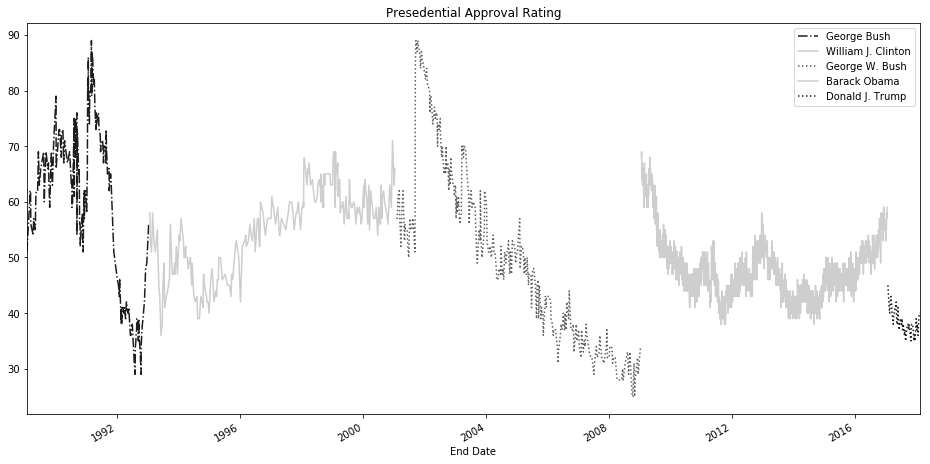

In [85]:
fig, ax = plt.subplots(figsize=(16,8))

styles = ['-.', '-', ':', '-', ':']
colors = [.9, .3, .7, .3, .9]
groups = pres_41_45.groupby('President', sort=False)

for style, color, (pres, df) in zip(styles, colors, groups):
    df.plot('End Date', 
            'Approving', 
            ax=ax,
            label=pres, 
            style=style, 
            color=cm.Greys(color), 
            title='Presedential Approval Rating'
           )

It is typical to call read_html multiple times before arriving at the table (or tables) that you desire. There are two primary parameters at your disposal to specify a table, match and attrs. The string provided to match is used to find an exact match for the actual text in the table. This is text that will show up on the web page itself. The attrs parameter, on the other hand, searches for HTML table attributes found directly after the start of the table tag.

# Understanding the differences between concat, join, and merge

> concat: 
* Pandas function
* Combines two or more pandas objects vertically or horizontally
* Aligns only on the index
* Errors whenever a duplicate appears in the index
* Defaults to outer join with option for inner

> join:
* DataFrame method
* Combines two or more pandas objects horizontally
* Aligns the calling DataFrame's column(s) or index with the other objects' index (and not the columns)
* Handles duplicate values on the joining columns/index by performing a cartesian product
* Defaults to left join with options for inner, outer, and right

> merge:
* DataFrame method
* Combines exactly two DataFrames horizontally
* Aligns the calling DataFrame's column(s)/index with the other DataFrame's column(s)/index
* Handles duplicate values on the joining columns/index by performing a cartesian product
* Defaults to inner join with options for left, outer, and right

In [92]:
years = [2016, 2017, 2018]
stock_tables = [pd.read_csv('./data/stocks_{}.csv'.format(year), index_col='Symbol') for year in years]

In [97]:
stock_2016, stock_2017, stock_2018 = stock_tables

### The *concat* function is the only one able to combine DataFrame vertically.

In [101]:
pd.concat(stock_tables, keys=[2016, 2017, 2018], names=['Years', 'Symbol'])

Shares  Low  High
Years Symbol                   
2016  AAPL        80   95   110
      TSLA        50   80   130
      WMT         40   55    70
2017  AAPL        50  120   140
      GE         100   30    40
      IBM         87   75    95
      SLB         20   55    85
      TXN        500   15    23
      TSLA       100  100   300
2018  AAPL        40  135   170
      AMZN         8  900  1125
      TSLA        50  220   400

### It can also combine DataFrames horizontally by changing the axis parameter to columns

In [102]:
pd.concat(stock_tables, keys=[2016, 2017, 2018], axis=1)

2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN

In [105]:
pd.concat(dict(zip(years, stock_tables)), axis=1, names=['Year','Symbol'])

Year     2016                2017                 2018               
Symbol Shares   Low   High Shares    Low   High Shares    Low    High
AAPL     80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
AMZN      NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0
GE        NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM       NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB       NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TSLA     50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
TXN       NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
WMT      40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN

For combinning DataFrames horizontally, we can use the **join & merge** methods to replicate **concat** function